In [3]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering 
from openpyxl import load_workbook
from IPython.display import Image
from sklearn.preprocessing import Imputer
from sklearn import tree
from subprocess import check_call
import random as rd
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

class CustomAHC(object):
    
    def __init__(self, filename, n_cluster = 4):
        self.dataset_raw = pd.read_excel(filename)
        self.dataset = self.dataset_raw[["BookingMonth", "DestinationCity", "Product", "GrossWt", "VolumeWt"]]
        self.dataset.columns = ["M01", "M02", "M03", "M04", "M05"]
        self.serial_numbers = [x for x in self.dataset_raw["SNo"]]
        self.n_cluster = n_cluster
        self.X = None
        self.labels = list()
    
    def transform(self):
        d = self.dataset.fillna(0)
        result = list()
        for i, row in d.iterrows():
            v1 = 0
            v2 = 0
            for x in range(1,3):
                v1 += row[f"M0{x}"]
            for x in range(4,6):
                v2 += row[f"M0{x}"]
            result.append([(v1 * (10 + rd.random()) / 2), (v2 * (10 + rd.random()) / 2)])
        self.X = pd.DataFrame(result).to_numpy()
        return self.X
    
    def get_cluster(self):
        model = AgglomerativeClustering(n_clusters=self.n_cluster, affinity='euclidean', linkage = 'single')
        model.fit(self.X)
        self.labels = model.labels_
        return model
    
    def plot(self):
        label = range(1, 11)
        plt.figure(figsize=(20, 10))
        plt.subplots_adjust(bottom=0.1)
        scatter = list()
        legends = list()
        for i in range(1, self.n_cluster):
            scatter.append(plt.scatter(self.X[self.labels == i, 0], self.X[self.labels == i, 1], s=30, label=str(i)))
            legends.append(f"Cluster {i}")
        plt.legend(scatter, legends, scatterpoints=1, loc="lower left", ncol=3, fontsize=20)
        plt.savefig("plot.png")
        return plt.show()
    
    def get_result(self):
        list_df = list()
        self.dataset_raw["Label"] = self.labels
        for i in range(self.n_cluster):
            df = self.dataset_raw[self.dataset_raw["Label"] == i]
            list_df.append(df)
        return list_df

In [15]:
data = CustomAHC(filename="datafix.xlsx", n_cluster=7)
X = data.transform()
pd.DataFrame(X)

,0,1
0,77.703570,51.154187
1,191.736532,10.455651
2,501.288841,15.857081
3,427.653036,10.104523
4,388.814606,10.544998
...,...,...
4319,453.349609,47.027334
4320,319.684025,10.996326
4321,438.265272,10.752881
4322,537.191928,10.272277


In [16]:
data.get_cluster()

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='single', memory=None, n_clusters=7,
                        pooling_func='deprecated')

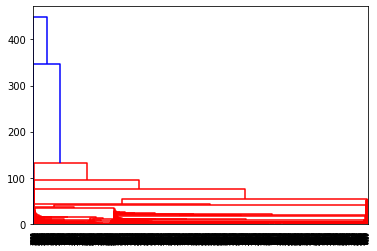

In [17]:
# dendrogram = sch.dendrogram(sch.linkage(X, method="single"))
# plt.savefig("dendrogram.png")

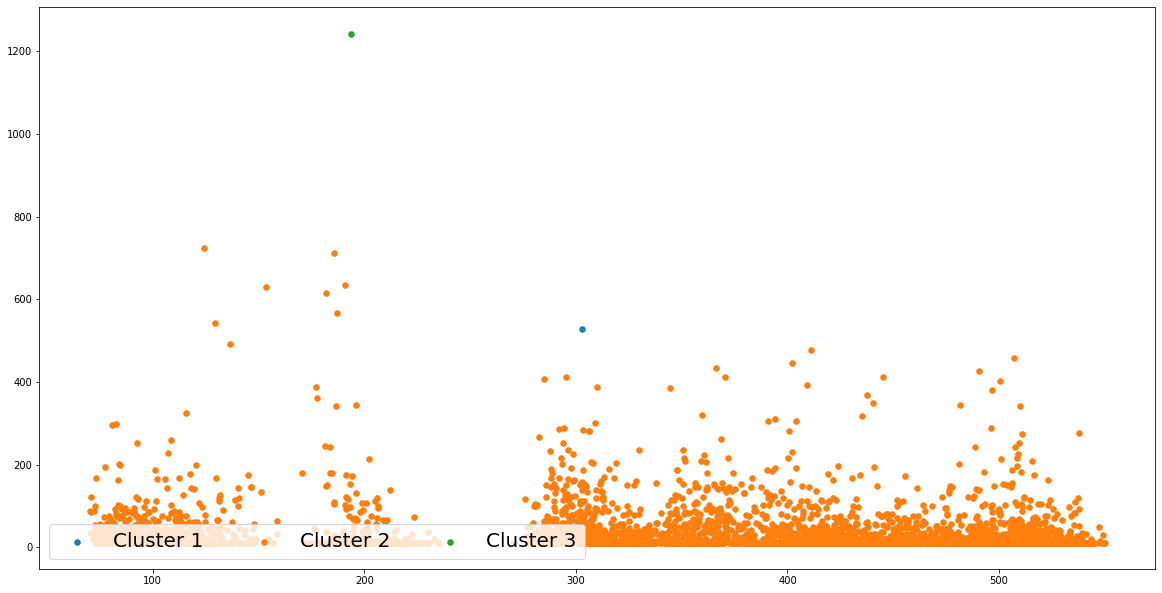

In [7]:
# data.plot()

In [18]:
results = data.get_result()
results[0]

,SNo,BookingDate,BookingMonth,ID,STTNo,Shipper,OriginCity,DestinationCity,ForwardArea,Product,GrossWt,VolumeWt,CommodityName,LastTrackingStatus,Label
1764,110991483,2018-05-14,5,JOG-1932,11-18-776922,BU WEN,JOG31,31,NaN,2,46,95,ACCESSORIES,RECEIPT BY GLORIA (FMY) .,0
2803,111317494,2018-06-23,6,JOG-1932,11-18-1008604,YOLANDA M PRABANDINI,JOG31,18,NaN,2,85,49,ACCESSORIES,RECEIPT BY TINTONY .,0


In [25]:
results[6]

,SNo,BookingDate,BookingMonth,ID,STTNo,Shipper,OriginCity,DestinationCity,ForwardArea,Product,GrossWt,VolumeWt,CommodityName,LastTrackingStatus,Label
1036,110779724,2018-04-14,4,JOG-1932,11-18-591784,DANNY CHRISTIAN,JOG31,31,NaN,2,53,53,CLOTHING/GARMENT,RECEIPT BY TITIK (IBU KOST) .,6
1763,110991225,2018-05-14,5,JOG-1932,10-17-1618483,BU WEN,JOG31,31,NaN,2,43,69,GLASSWARE,RECEIPT BY GLORIA (FMY) .,6
1810,111006639,2018-05-15,5,JOG-1932,11-18-790014,PT MOLAY SATRYA INDONESIA,JOG31,31,NaN,2,61,61,CLOTHING/GARMENT,RECEIPT BY YOKO(CSG) .,6
1990,111052012,2018-05-21,5,JOG-1932,10-17-1618133,GUSRIAN PRATAMA,JOG31,21,NaN,2,52,44,CLOTHING/GARMENT,RECEIPT BY SUHAIRI .,6
2802,111317444,2018-06-23,6,JOG-1932,10-17-1618174,YOLANDA M PRABANDINI,JOG31,18,NaN,2,45,63,ACCESSORIES,RECEIPT BY TINTONY .,6
4199,112004413,2018-08-27,8,JOG-1932,10-17-1618681,R DWI CAHYONO,JOG31,21,NaN,2,80,42,CLOTHING/GARMENT,RECEIPT BY HELY .,6


In [10]:
from sklearn import metrics

In [11]:
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(data.X, data.labels, metric='euclidean'))

Silhouette Coefficient: 0.653
